In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [9]:
class ATCS_KMeans:
    # default: 
    # k = 8
    # 10 iterations
    # random initialization of centriods
    # tolerance = .001
    # max number of iterations is 100
    # constructor for the ATCS_KMeans class
    def __init__(self, points, k = 8, nbInit = 10, init = "random", tolerance = .001, maxIter = 100):
        self.points = points
        self.k = k
        self.nbInit = nbInit
        self.init = init
        self.tolerance = tolerance
        self.maxIter = maxIter
        self.centroids = []
        self.classification = [0 for i in range(len(points))]
        self.centroidClusters = [[] for i in range(k)]

    # initialzies the centroids either randomly or using the KMeans++ method
    def init_centroids_random(self):
        if(self.init == "random"):
            # randomly choose k points
            self.centroids = np.array(self.points[np.random.choice(self.points.shape[0], self.k, replace = False)])
        elif(self.init == "++"):
            # add the first random centroid
            point = self.points[np.random.choice(self.points.shape[0], replace = False)]
            self.centroids.append(point)
            
            # add k-1 centroids by weighting probabilities based on distance from previous centroids
            
            # weighted probabilities
            weights = np.zeros(len(self.points))
            for i in range(1, self.k):
                # update the weights by adding the distance to the previously added centroid
                distances = sp.spatial.distance.cdist(self.points, [self.centroids[i-1]])
                for j in range(0, len(self.points)):
                    weights[j] += distances[j][0]
                self.centroids.append(self.points[np.random.choice(self.points.shape[0], replace = False, p = weights/np.sum(weights))])
            self.centroids = np.array(self.centroids)
                            
    def draw_state(self):
        ax = sns.scatterplot(x = self.points[:,0], y = self.points[:,1], hue = self.classification, palette = 'bright')
        xArr = []
        yArr = []
        print(self.centroids)
        for i in range(0, self.k):
            xArr.append(self.centroids[i][0])
            yArr.append(self.centroids[i][1])
        sns.scatterplot(x = xArr, y = yArr, hue = np.arange(self.k), palette = 'bright', marker = "*", s = 500)
        
        # putting legend labels in a dictionary to remove repeats
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        plt.show()
        
    def classify_points(self):
        # puts all distances between points and centroids in an array
        distances = sp.spatial.distance.cdist(self.points, self.centroids)
        self.centroidClusters.clear()
        for i in range(0, len(self.points)):
            minIndex = 0
            minDist = distances[i][0]
            for j in range(0, len(distances[i])):
                # updating the minimum distance from point i to a centroid
                if(distances[i][j] < minDist):
                    minIndex = j
                    minDist = distances[i][j]
            self.classification[i] = minIndex
            self.centroidClusters[minIndex].append(self.points[i])
                
    def calculate_SSE(self):
        # calculates the sum of squared errors
        total = 0
        for i in range(0, len(self.points)):
            distance = sp.spatial.distance.euclidean(self.points[i], self.centroids[self.classification[i]])
            total += distance*distance
        return total
    
    def update_centroids(self):
        # finds the mean of points to find their centroid
        for i in range(0, self.k):
            self.centroids[i] = np.mean(self.centroidClusters[i], axis = 0)
            
    def cluster_points(self, verbose = False):
        # bestSSE and bestCluster will be assigned meaningful values after the first iteration through the for loop
        bestSSE = -1
        bestCluster = ATCS_KMeans(self.points, self.k, self.nbInit, self.init, self.tolerance, self.maxIter)
        for i in range(0, self.nbInit):
            SSE = 0
            stop = False
            iteration = 0
            cluster = ATCS_KMeans(self.points, self.k, self.nbInit, self.init, self.tolerance, self.maxIter)
            cluster.init_centroids_random()
            while not stop and iteration < self.maxIter:
                cluster.classify_points()
                newSSE = cluster.calculate_SSE()
                if verbose:
                    print("SSE:", newSSE)
                cluster.update_centroids()
                if abs(newSSE - SSE) < cluster.tolerance:
                    stop = True
                SSE = newSSE
                iteration += 1
            if(bestSSE == -1 or SSE < bestSSE):
                bestSSE = SSE
                bestCluster = cluster
            if verbose:
                print("\n")
         
        self.__dict__.update(bestCluster.__dict__)
        if verbose:
            print("Final SSE:", bestSSE)
            bestCluster.draw_state()

SSE:  704.1207353741923


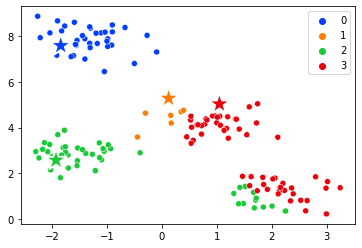

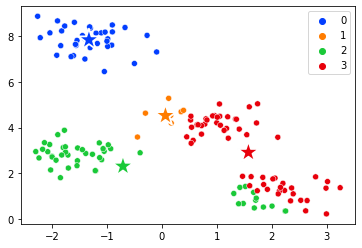

SSE:  254.88670739031147


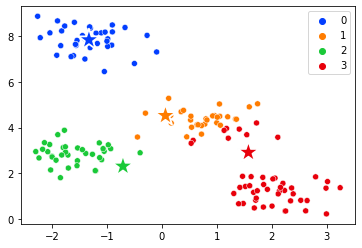

SSE: 889.0496117905126
SSE: 680.6095261401488
SSE: 678.5998801859156
SSE: 677.0892440219648
SSE: 676.5811097562514
SSE: 676.3447102782668
SSE: 676.2152099679853
SSE: 676.1365336461115
SSE: 676.0851477523687
SSE: 676.0497345130199
SSE: 676.0242941671114
SSE: 676.0054028666018
SSE: 675.9909901779488
SSE: 675.979744018311
SSE: 675.9708000466151
SSE: 675.9635700135252
SSE: 675.9576422808095
SSE: 675.9527217934003
SSE: 675.9485925798903
SSE: 675.9442664897878
SSE: 675.9194593091597
SSE: 675.8758093643468
SSE: 675.8364705030481
SSE: 675.7847991156985
SSE: 675.7310268123656
SSE: 675.6488547436933
SSE: 675.5771727562858
SSE: 675.5138779406611
SSE: 675.3861207114514
SSE: 675.1976326570575
SSE: 674.8090758878778
SSE: 674.330884259374
SSE: 673.8959652158778
SSE: 673.4992011604179
SSE: 673.1362179360647
SSE: 672.7829459668693
SSE: 672.3111993883408
SSE: 671.7922042243786
SSE: 671.2585929231697
SSE: 670.6677039778358
SSE: 670.1036776497868
SSE: 669.4491623277397
SSE: 668.7904111973015
SSE: 668.0765

SSE: 501.6077974820663
SSE: 271.59616423481333
SSE: 271.27095035552674
SSE: 271.0699333096492
SSE: 270.84047533674766
SSE: 270.72795804218487
SSE: 270.65378577584
SSE: 270.6096426987938
SSE: 270.5812253336606
SSE: 270.5618489352439
SSE: 270.5480426112215
SSE: 270.5378564757961
SSE: 270.53012576188013
SSE: 270.52411953287555
SSE: 270.51936012980724
SSE: 270.5155246357394
SSE: 270.51197700960654
SSE: 270.4910232239516
SSE: 270.4620544302677
SSE: 270.4375849215472
SSE: 270.41672848460973
SSE: 270.3988069305816
SSE: 270.3832941090586
SSE: 270.36977675099473
SSE: 270.35792659581296
SSE: 270.3474802324438
SSE: 270.3381513717801
SSE: 270.32433682814366
SSE: 270.31200581576087
SSE: 270.30095240910606
SSE: 270.2910053440825
SSE: 270.28202122193517
SSE: 270.2738792231845
SSE: 270.26647695891154
SSE: 270.2597271873466
SSE: 270.2535551949657
SSE: 270.2478966923565
SSE: 270.24269611210997
SSE: 270.2379052231042
SSE: 270.23348199555664
SSE: 270.22938966619455
SSE: 270.225595964124
SSE: 270.222072466

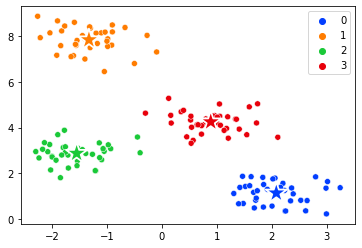

In [8]:
points, categories = make_blobs(n_samples = 150, centers = 4, cluster_std = 0.5, shuffle = True, random_state = 0)
clustering = ATCS_KMeans(points, 4)
clustering.init_centroids_random()
clustering.classify_points()
print("SSE: ", clustering.calculate_SSE())
clustering.draw_state()
clustering.update_centroids()
clustering.draw_state()
clustering.classify_points()
print("SSE: ", clustering.calculate_SSE())
clustering.draw_state()
clustering.cluster_points(True)